Found 192 files belonging to 2 classes.
Using 154 files for training.
Found 192 files belonging to 2 classes.
Using 38 files for validation.
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7571 - loss: 0.4919 - val_accuracy: 0.8947 - val_loss: 0.5088
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9705 - loss: 0.1021 - val_accuracy: 0.9737 - val_loss: 0.0318
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9770 - loss: 0.1138 - val_accuracy: 0.9737 - val_loss: 0.1080
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 7.9614e-04 - val_accuracy: 0.9211 - val_loss: 0.5793
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.8947 - val_loss: 0.7487
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 0.9211 - val_loss: 0.4980
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 1.0406e-04 - val_accuracy: 0.9474 - val_lo

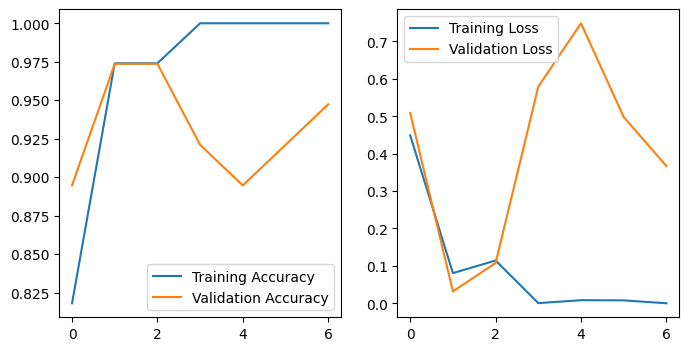

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#Load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
#Freeze the base model
base_model.trainable = False

#Create the custom head for our dataset
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# Step 4: Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

dataset_path = 'C:/Users/Jones/OneDrive - UT Arlington/Desktop/jones/Studies/Haridev/New P/PetImages'

image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'  # set label_mode to 'binary' for binary classification
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'  # set label_mode to 'binary' for binary classification
)

In [ ]:

#Train the model
checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint, early_stop])

In [ ]:

#Save the model
model.save('final_model.keras')

In [ ]:
#Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()